**@author : Kevin KURTZ**<br>
**@email : kevin.kurtz@efrei.net** <br>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier



In [3]:

# PART 1 - Data Exploration

#### Let's start by loading the Pima Indians Diabetes Dataset
#### Ressource: https://www.kaggle.com/uciml/pima-indians-diabetes-database

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)
#df = pd.read_csv("diabetes.csv")

# Add column names as specified in the dataset documentation
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']



In [4]:

# savoir nombre de lignes et de colonnes:
df.shape


(768, 9)

In [5]:
# Display basic information and statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
# vérifier valeur ménimale de la colonne SkinThickness
df['SkinThickness'].min()

0

In [7]:
# Séparer les données en fonction de l'Outcome
df_outcome_0 = df[df['Outcome'] == 0]
df_outcome_1 = df[df['Outcome'] == 1]

# Calculer les médianes pour les Outcome 0 et Outcome 1
median_outcome_0 = df_outcome_0[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].median()
median_outcome_1 = df_outcome_1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].median()

# Fonction pour imputer les valeurs 0 avec la médiane selon l'Outcome
def impute_with_median(row, median_0, median_1):
    if row['Outcome'] == 0:
        for col in median_0.index:
            if row[col] == 0:
                row[col] = median_0[col]
    else:
        for col in median_1.index:
            if row[col] == 0:
                row[col] = median_1[col]
    return row

# Appliquer la fonction à chaque ligne du dataset
df = df.apply(impute_with_median, axis=1, args=(median_outcome_0, median_outcome_1))

# Vérification après imputation
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000      768.00000  768.000000   
mean      3.845052  121.677083      72.378906       27.43099   91.783854   
std       3.369578   30.464161      12.104431        9.32146  108.121136   
min       0.000000   44.000000      24.000000        7.00000    0.000000   
25%       1.000000   99.750000      64.000000       21.00000   39.000000   
50%       3.000000  117.000000      72.000000       27.00000   39.000000   
75%       6.000000  140.250000      80.000000       32.00000  127.250000   
max      17.000000  199.000000     122.000000       99.00000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.433919                  0.471876   33.240885    0.348958  
std      6.880664                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# voirla médiane de chaque colonne
print(df_outcome_0.median())
print(df_outcome_1.median())

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                21.000
Insulin                      39.000
BMI                          30.050
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
dtype: float64
Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.000
SkinThickness                27.000
Insulin                       0.000
BMI                          34.250
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
dtype: float64


In [9]:
# vérifier valeur ménimale de la colonne SkinThickness
df['Pregnancies'].max()

17.0

#### Verifying that all columns are numerical

Before proceeding, we need to verify that all the features in the dataset are numerical. This step is important because categorical features would need to be encoded for the machine learning models to handle them. 

In this case, by checking the data types of each column, we ensure that no categorical encoding is necessary since all features are already numerical.


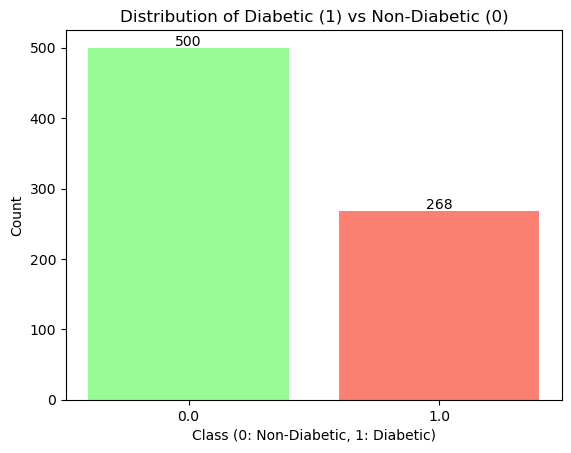

In [10]:

# Let's analyze the distribution of target labels to check the balance of classes.
class_counts = df['Outcome'].value_counts()

ax = sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetic (1) vs Non-Diabetic (0)')
plt.xlabel('Class (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha="center")

colors = ['palegreen', 'salmon']
plt.bar(class_counts.index, class_counts, color=colors)

plt.show()

#### Why PCA is not necessary in this context

Principal Component Analysis (PCA) is a powerful technique used to reduce the number of dimensions in datasets that have many features (e.g., hundreds or thousands). The goal of PCA is to simplify the dataset by transforming the original features into new principal components that capture most of the variance in the data.

In our case, the dataset only has **8 features**. Applying PCA here would not provide significant benefits for the following reasons:

1. **Limited dimensionality reduction**: With only 8 features, PCA would likely only reduce the number of dimensions to 6 or 7, which is not a substantial reduction compared to larger datasets. The original number of features is already manageable for machine learning models.
   
2. **Loss of interpretability**: After applying PCA, the new components would be linear combinations of the original features (e.g., "Glucose", "BloodPressure"), making it harder to interpret which original factors are influencing the model's decisions. This loss of interpretability is not ideal in a medical context where understanding the impact of features is important.
   
3. **Minimal performance gain**: Since the dataset is not highly complex, PCA is unlikely to significantly improve model performance or computation speed. The cost of losing interpretability outweighs the potential performance


In [11]:
# PART 2 - Data Normalization

#### Now, it's time to normalize our dataset:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

# Keep the 'Outcome' column in the scaled dataframe
df_scaled['Outcome'] = df['Outcome']

df_scaled


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.864625      -0.031324       0.812528 -0.849452  0.169583   
1      -0.844885 -1.204727      -0.527333       0.168432 -0.488510 -0.848424   
2       1.233880  2.014265      -0.692669      -0.046266 -0.849452 -1.328341   
3      -0.844885 -1.073339      -0.527333      -0.475663  0.020510 -0.630280   
4      -1.141852  0.503310      -2.676706       0.812528  0.705374  1.551163   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679177       0.299349       2.208068  0.816433  0.067782   
764    -0.547919  0.010607      -0.196660      -0.046266 -0.488510  0.634957   
765     0.342981 -0.022240      -0.031324      -0.475663  0.187099 -0.906596   
766    -0.844885  0.141994      -1.023342      -0.046266 -0.849452 -0.339421   
767    -0.844885 -0.941952      -0.196660       0.383131 -0.488510 -0.295792   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995      1.0  
1                   -0.365061 -0.190672      0.0  
2                    0.604397 -0.105584      1.0  
3                   -0.920763 -1.041549      0.0  
4                    5.484909 -0.020496      1.0  
..                        ...       ...      ...  
763                 -0.908682  2.532136      0.0  
764                 -0.398282 -0.531023      0.0  
765                 -0.685193 -0.275760      0.0  
766                 -0.371101  1.170732      1.0  
767                 -0.473785 -0.871374      0.0  

[768 rows x 9 columns]

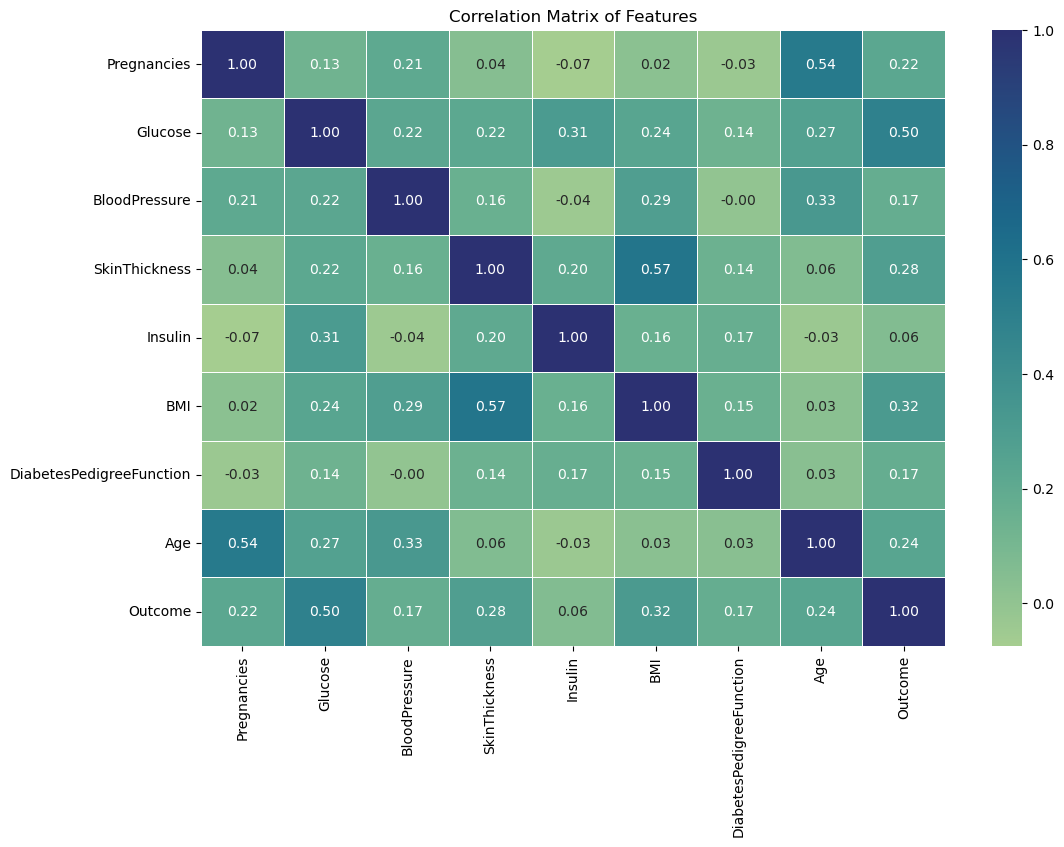

In [12]:
# faire matrice de corrélation
# PART 2 - Feature Selection with Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = df_scaled.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [13]:

# PART 3 - Decision Trees

#### 1. We need to train a decision tree model on our dataset:

X = df_scaled.drop(columns='Outcome')
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)



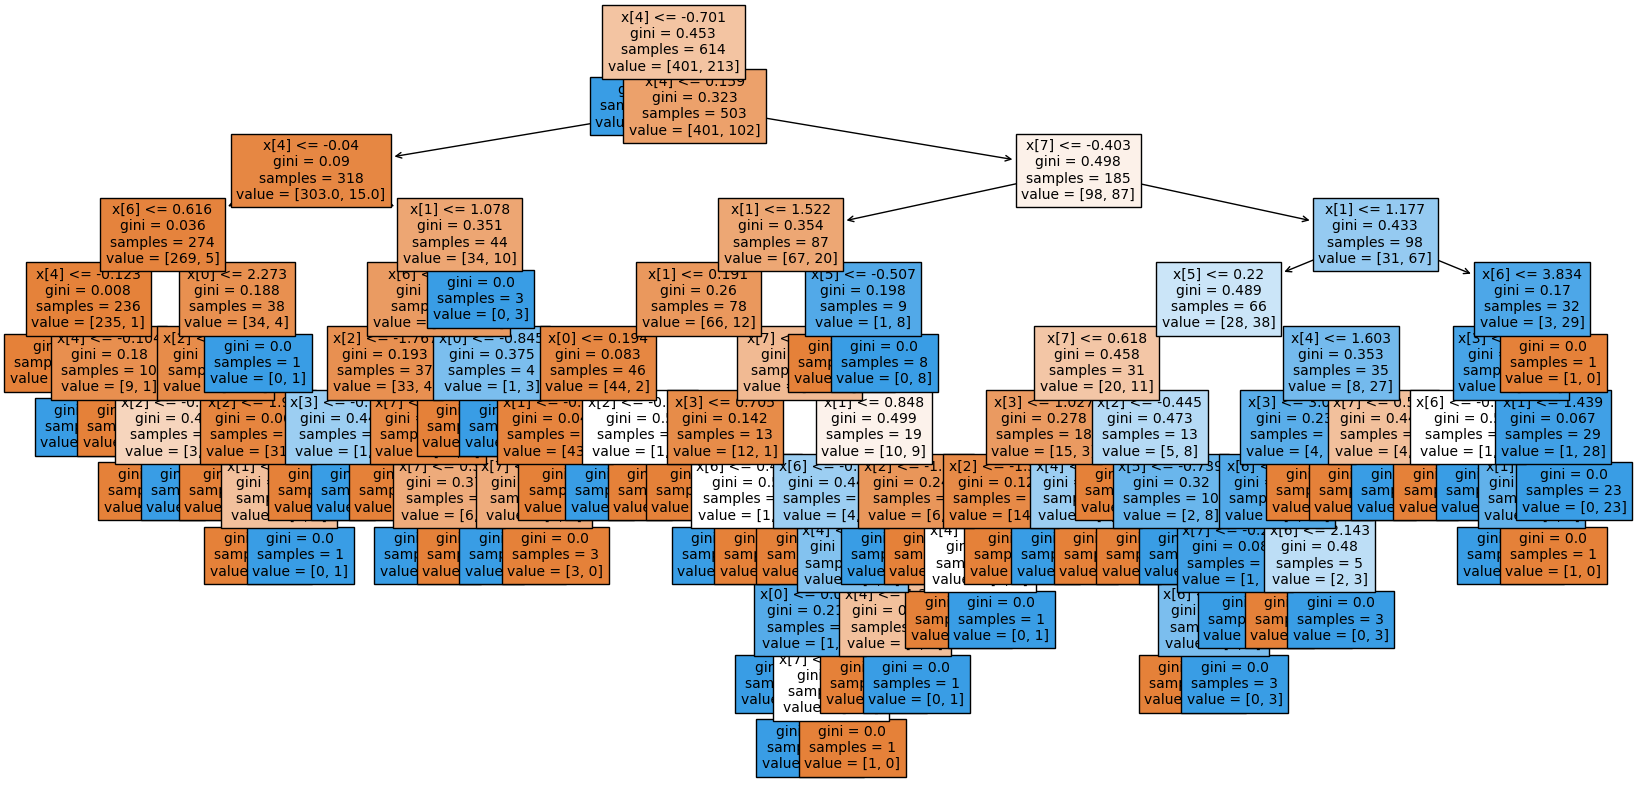

Accuracy: 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        99
         1.0       0.75      0.80      0.77        55

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154

Accuracy on the training set: 1.0
Classification Report on the training set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       401
         1.0       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [14]:
#### 2. We need to evaluate the model performances.

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, fontsize=10)
plt.show()

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Test on the training set
y_pred_train = clf.predict(X_train)
print("Accuracy on the training set:", accuracy_score(y_train, y_pred_train))
print("Classification Report on the training set:\n", classification_report(y_train, y_pred_train))



In [15]:
# PART 4 - Random Forest

#### 1. We can now train a Random Forest model:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8766233766233766
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        99
         1.0       0.85      0.80      0.82        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



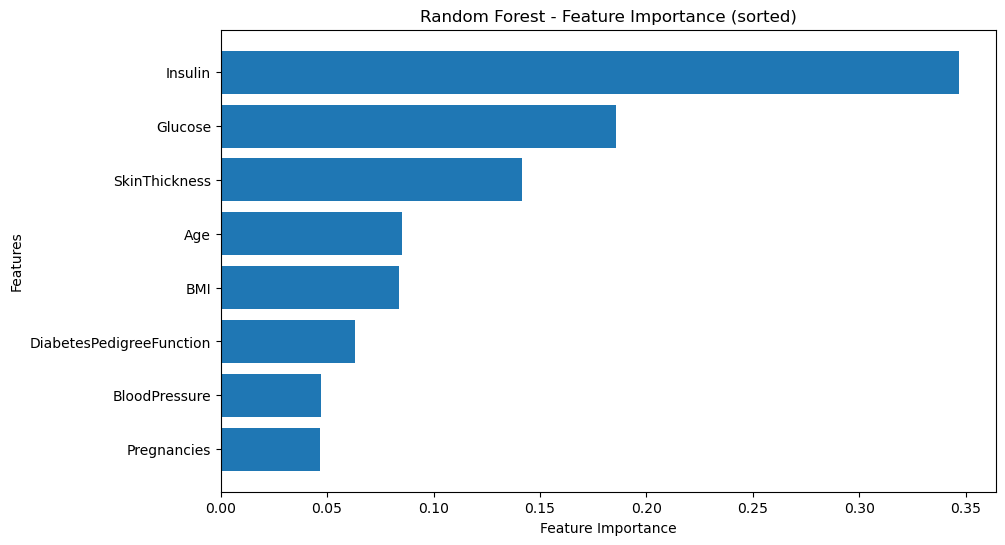

In [16]:

# Feature importance analysis
rf_feature_importance = rf.feature_importances_
features = X_train.columns

sorted_idx_rf = np.argsort(rf_feature_importance)
sorted_features_rf = pd.DataFrame({'Feature': features[sorted_idx_rf], 'Importance': rf_feature_importance[sorted_idx_rf]})

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_rf['Feature'], sorted_features_rf['Importance'], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance (sorted)")
plt.show()



In [17]:
# PART 5 - Hyperparameter Tuning with Grid Search

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)

print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Decision Tree Classification Report:\n", classification_report(y_test, y_pred_best))


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 0.8506493506493507
Optimized Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89        99
         1.0       0.83      0.73      0.78        55

    accuracy                           0.85       154
   macro avg       0.85      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



In [18]:
# Logistic Regression
#### Train a Logistic Regression model
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.7792207792207793
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83        99
         1.0       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [19]:
# K-Nearest Neighbors (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN - Accuracy: 0.7922077922077922
KNN - Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        99
         1.0       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [20]:
# MLP
clf_mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
clf_mlp.fit(X_train, y_train)

y_pred_mlp = clf_mlp.predict(X_test)
print("MLP Classifier - Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classifier - Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier - Accuracy: 0.8441558441558441
MLP Classifier - Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        99
         1.0       0.79      0.76      0.78        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



In [21]:

# PART 6 - Comparison

#### Let's compare Random Forest & Decision Tree performances.

In [22]:
import ydata_profiling
from ydata_profiling import ProfileReport 
 
# Generate the profiling report 
profile = ProfileReport(df, title="Pima Indians Diabetes Dataset Profiling Report") 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]